## EJERCICIO KNN GRUPO Ralphy,Gabriel, Made y Mercedes

#### ENUNCIADO:
<p>Vas a realizar ahora un estudio utilizando KNN. Después compara los resultados con Regresión Logística.

Busca cuáles son los hiperparámetros que pueden ajustarse en KNN (además del número de vecinos) y utiliza los métodos que comentamos de búsqueda en rejilla(GridSearchCV) y búsqueda aleatoria(RandomizedSearchCV) para encontrar los valores óptimos para ellos.<p>

[Descarga del CSV de "Breast Cancer"](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Imports 

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from  scipy.stats import uniform
import seaborn as sns


## Cargamos el CSV

In [104]:
df = pd.read_csv('Breast_Cancer.csv')

df = df.drop("Unnamed: 32",axis=1)

df.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "área_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]

df

,id,diagnostico,radio_medio,textura_media,perimetro_medio,área_media,suavidad_media,compacidad_media,concavidad_media,media_puntos_concavidad,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compacidad_peor,concavidad_peor,puntos_concavos_peor,simetia_peor,fractal_dimension_peor
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:

X  = df[["radio_medio", "textura_media", "perimetro_medio", "área_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]]
X
df['diagnostico'] = df.diagnostico.map({'M' : 1, 'B' : 0 })
y = df['diagnostico']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnostico, Length: 569, dtype: int64

<p>Split de los datos<p>

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [107]:

# Definición del modelo
knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search_knn.best_params_)




Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 6}


<p>El valor que nos da mayor accuracy segun el Random Search es 6: <p>

In [108]:
random_search_knn.score(X_test, y_test) 

0.9473684210526315

In [109]:
predicciones = random_search_knn.predict(X_test)

accuracy = accuracy_score(y_test, predicciones)

print(f'Precisión del clasificador k-NN con todas las clases: {accuracy:.2f}')

Precisión del clasificador k-NN con todas las clases: 0.95


### Dibujar el mapa de calor 

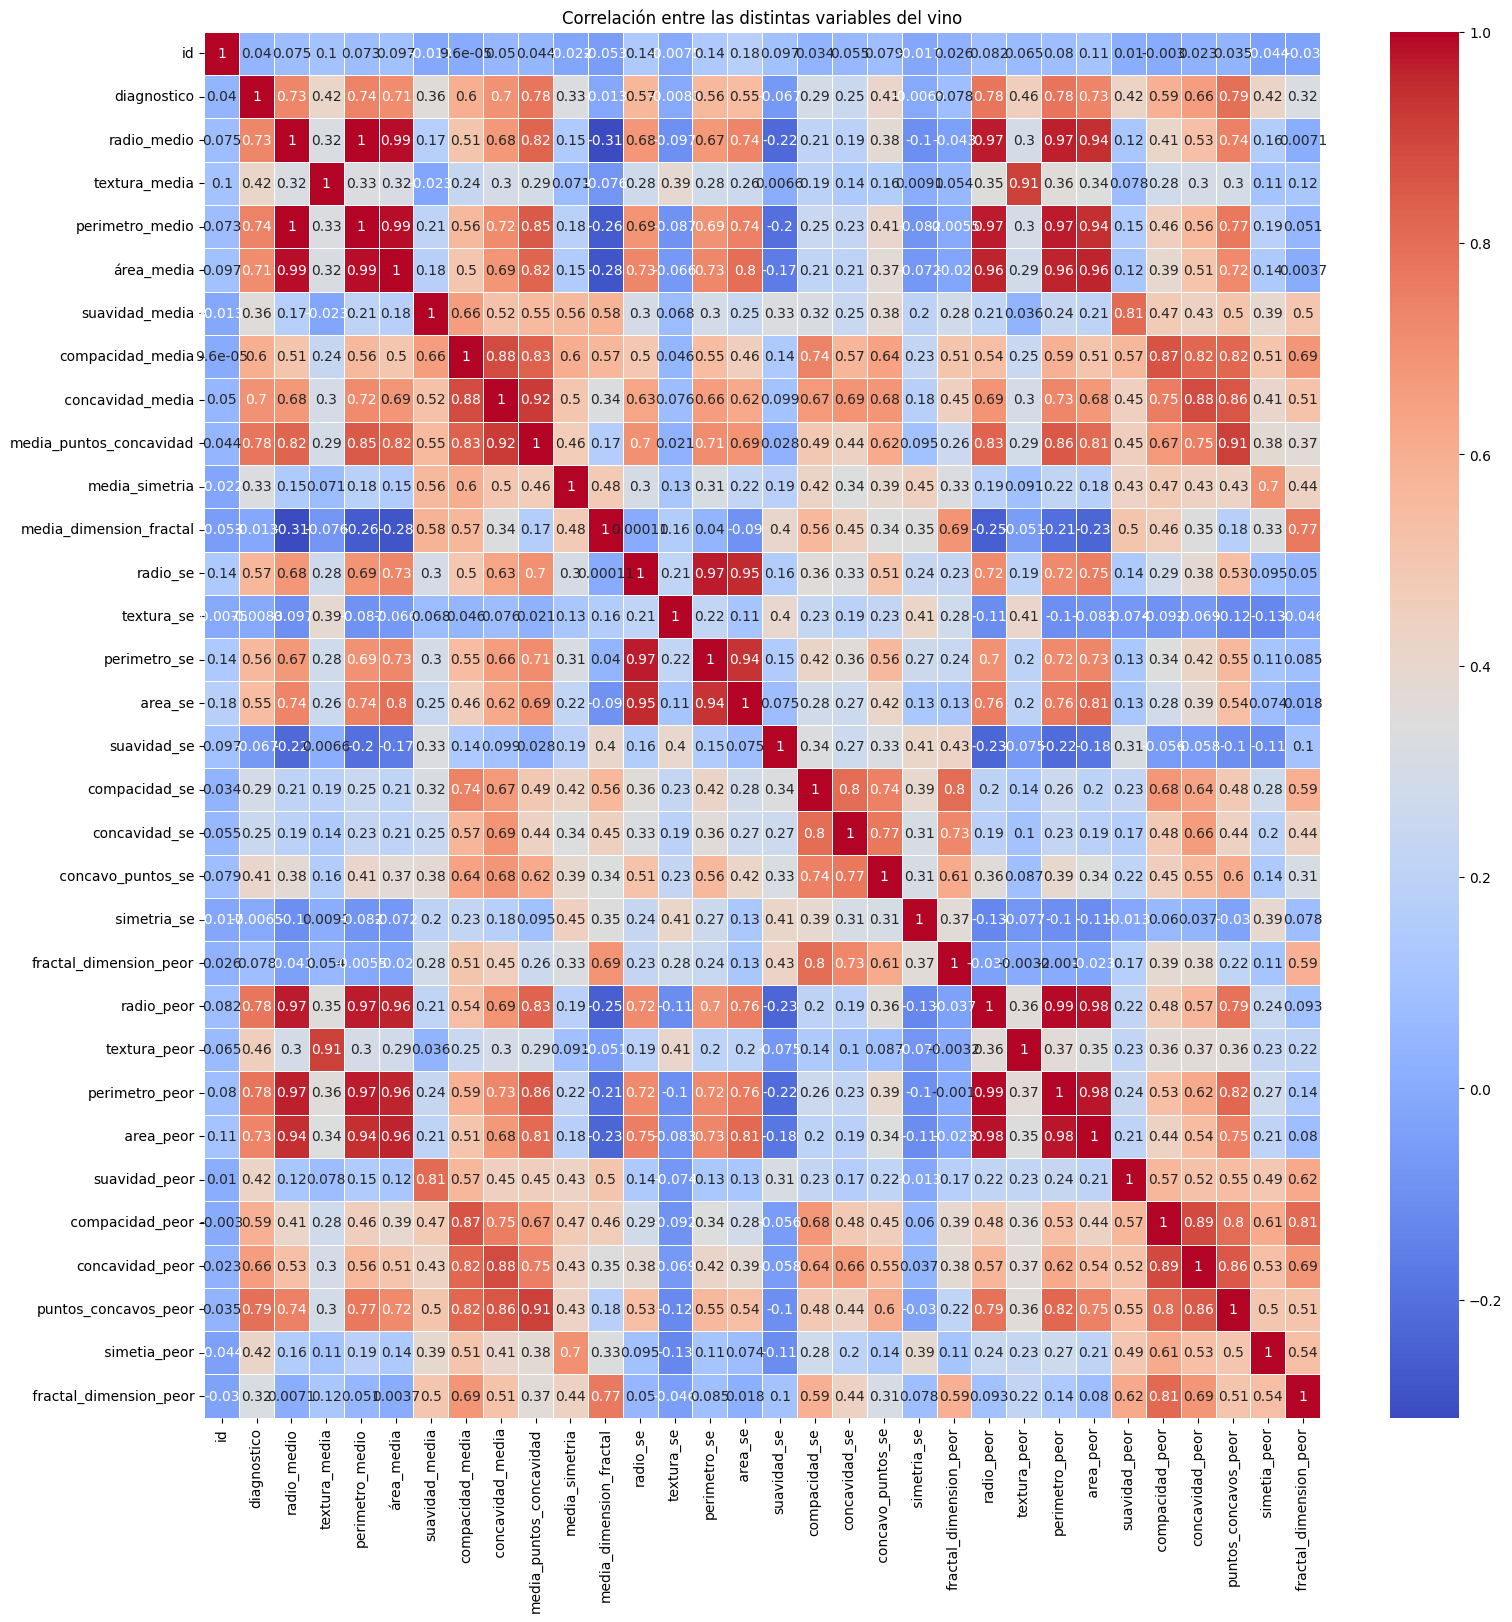

In [110]:
plt.figure(figsize=(18,18))
plt.title("Correlación entre las distintas variables del vino")
sns.heatmap(df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

#### Conclusiones 

 Hemos determinado, gracias a nuestro mapa de calor, que los siguientes campos son los más relacionados para obtener el diagnóstico: 
 - radio_medio.
 - textura_medio 
 - perimetro_medio 
 - área_media.
 - compacidad_media.
 - concavidad_media.
 - media_puntos_concavidad.
 - radio_peor.
 - textura_peor. 
 - perimetro_peor. 
 - área_peor.
 - compacidad_peor.
 - concavidad_peor.
 - puntos_concavos_peor.


<p>Ahora, realizaremos el entrenamiento unicamente con los datos anteriormente listados.<p>

In [112]:
X  = df[["radio_medio", "textura_media", "perimetro_medio", "área_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "radio_peor", "textura_peor", "perimetro_peor"," area_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"]]
X

y = df['diagnostico']
y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


knn = KNeighborsClassifier()

# Distribución de hiperparámetros a explorar
param_distributions = {
    'n_neighbors': range(1, 12),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

# Random Search
random_search_knn = RandomizedSearchCV(knn, param_distributions, n_iter=44, cv=5, random_state=0)
random_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search_knn.best_params_)

random_search_knn.score(X_test, y_test) 

predicciones = random_search_knn.predict(X_test)

accuracy = accuracy_score(y_test, predicciones)

print(f'Precisión del clasificador k-NN con todas las clases: {accuracy:.2f}')

Mejores hiperparámetros: {'weights': 'uniform', 'p': 1, 'n_neighbors': 8}
Precisión del clasificador k-NN con todas las clases: 0.96
